Encryption using Logistic Map and 8 bit shift register

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
def nextlog(x,r):
    return r*x*(1-x)

def generateseq(seed, r, length):
    temp = seed
    seq = []
    for i in range(length):
        nextterm = nextlog(temp,r)
        if abs(nextterm)>1:
            return seq
        seq.append(nextterm)
        temp = nextterm
    return seq

def normalize(seq):
    out = [0 for i in range(len(seq))]
    for i in range(len(seq)):
        out[i] = int((seq[i]*256)%256)
    return out

def dtb8bit(n):  
    y= bin(n).replace("0b", "")
    while len(y)!=8:
        y='0'+y
    return y
    

def lfsr_gen(seed, length):
    lst=[seed]
    for x in range(1,length):
        y=dtb8bit(lst[x-1])
        xor_bit=int(y[0])^int(y[4])^int(y[5])^int(y[6])
        if lst[x-1]*2 >= 256:
            lst.append((lst[x-1]*2) + xor_bit - 256)
        else:
            lst.append((lst[x-1]*2) + xor_bit)
    return lst

def binaryToDecimal(binary): 
      
    binary1 = binary 
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    print(decimal) 

In [ ]:
#Constants
lfsr_seed = 120 #Seed value for lfsr. Input some number in [0,255] here.
r_log = 3.99 #r value in logistic map. Kept closer to 4 to create highly random sequence.

In [3]:
#Creating image sequence
img = cv.imread("lenna.png")
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
M,N = gray.shape[0], gray.shape[1]
imgseq = gray.reshape(1,M*N)
P=imgseq[0]                          

In [4]:
#Creating key sequence
k1=normalize(generateseq(0.2456789,r_log,M*N))
k2=lfsr_gen(lfsr_seed,M*N)
key=[]

for x in range(len(k1)):
    key.append(k1[x]^k2[x])

In [15]:
#Creating encrpyted image
P_encrypted=[]

for x in range(len(key)):
    P_encrypted.append(key[x]^P[x])

ar=np.array(P_encrypted)
img_encr=ar.reshape(M,N)

    

In [16]:
img_encr

array([[103, 151, 244, ...,  48,   4,  39],
       [164,   4, 192, ..., 166, 112,  89],
       [ 65,  67, 129, ..., 224, 235, 144],
       ...,
       [213, 248, 119, ...,  88, 249,  80],
       [ 98, 119,  55, ...,  70,  84,  87],
       [103,  12, 230, ...,  71, 249,  86]], dtype=int32)

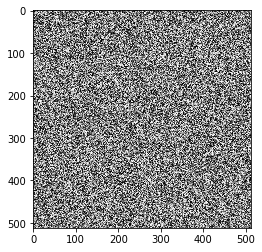

In [19]:
plt.imshow(img_encr,'gray')
plt.show()

Decryption Process

In [21]:
#Decrypting image by XORing with Key sequence.
flat=img_encr.reshape(1,M*N)
P_dash=flat[0]
P_decrypted=[]

for x in range(len(key)):
    P_decrypted.append(key[x]^P_dash[x])

d_ar=np.array(P_decrypted)
img_decr=d_ar.reshape(M,N)



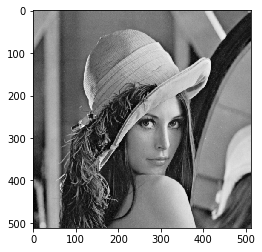

In [22]:
plt.imshow(img_decr,'gray')
plt.show()